# **Tugas Pagerank**

1. Buat graph berarah dengan networkx (minimal 9 node )
Hitung manual pagerank dari graph yang anda buat
Hitung menggunakan pagerank menggunakan networkx

2. Implementasikan ulang  https://github.com/Shakunni/Extractive-Text-Summarization/blob/master/extractive_summarizer.ipynb
3. Upload di github repository webstatis masing masing
4.  Beri penjelasan terkait dengan proses



In [57]:
import networkx as nx
G=nx.DiGraph()

G.add_edges_from([(1,2),(1,4),(2,3),(3,2),(3,4),(3,5),(4,1),(4,8),(5,6),(5,8),(6,5),(6,7),
                  (6,8),(6,9),(7,6),(7,8),(8,4),(8,7),(8,6), (9,1)])

In [ ]:
G.number_of_nodes()

9

In [ ]:
G.nodes()

NodeView((1, 2, 4, 3, 5, 8, 6, 7, 9))

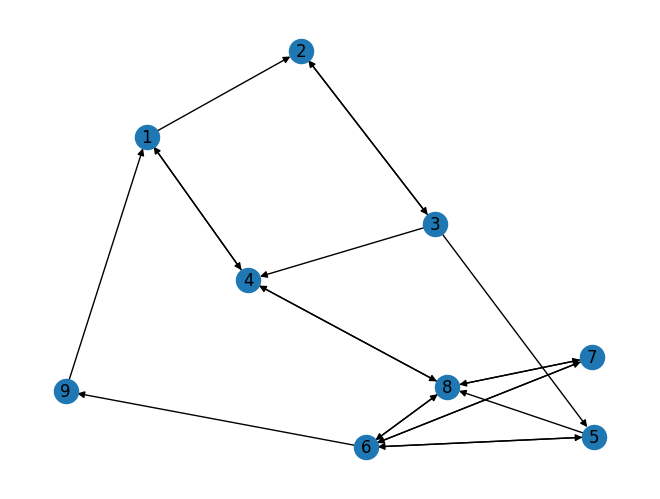

In [58]:
nx.draw(G, with_labels=True)
#nx.draw_random(G)
#nx.draw_circular(G)
#nx.draw_spectral(G)

###**Hitung Manual**

**Page Rank**

Suatu page penting jika ditunjuk oleh banyak page penting

n = jumlah node keluar
p = jumlah node yang masuk

Rumus : 
>$PR(u) = \Sigma v \epsilon in(u) \frac{PR(v)}{|out(v)|}$

“nilai PageRank untuk halaman u tergantung pada nilai PageRank
untuk setiap halaman v yang terdapat di set in(u) (set semua halaman yang terhubung ke
halaman u), dibagi dengan angka |keluar(v)| tautan keluar dari halaman v”

**Langkah-langkah**
1. Iterasi 0: Inisialisasi semua peringkat menjadi 1/(jumlah
jumlah halaman) = (1/9)
2. Iterasi 1: Untuk setiap halaman u, perbarui peringkat u ke
menjadi jumlah dari setiap peringkat halaman masuk v dari
iterasi sebelumnya, dibagi dengan jumlah
jumlah total link dari halaman v.
**P1** = punya 2 link dari P4 yang punya 1 link keluar dan P9 juga punya 1 link keluar maka:
>PR(P1)=(1/9)/1+(1/9)/1 = 2/18

PR(P2)=(1/9)/2+(1/9)/3 = 5/54
PR(P3)=(1/9)/1 = 1/9
PR(P4)=(1/9)/2+(1/9)/3+(1/9)/3 = 7/54
PR(P5)=(1/9)/3+(1/9)/4 = 7/108
PR(P6)=(1/9)/2+(1/9)/2+(1/9)/3+(1/9)/1 = 14/54
PR(P7)=(1/9)/2+(1/9)/3 = 5/54
PR(P8)=(1/9)/2+(1/9)/2+(1/9)/2+(1/9)/4 = 7/36
PR(P9)=(1/9)/4 = 1/36

| | Iterasi 0 | Iterasi 1 | Hasil| Rank |
|-|:----------|:----------|:----|:-----|
|P1| 1/9 | 2/18 | 0,1111 | 4 |
|P2| 1/9 | 5/54 | 0,0925 | 6 |
|P3| 1/9 | 1/9 | 0,1111 | 5 |
|P4| 1/9 | 7/54 | 0,1296 | 3 |
|P5| 1/9 | 7/108 | 0,0648 | 8 |
|P6| 1/9 | 14/54 | 0,2592 | 1 |
|P7| 1/9 | 5/54 | 0,0925 | 7 |
|P8| 1/9 | 7/36 | 0,1944 | 2 |
|P9| 1/9 | 1/36 | 0,0277 | 9 |









In [60]:
# PageRank menggunakan networkx
nx.pagerank(G, alpha=0.9)

{1: 0.11722594067159472,
 2: 0.09205022941972085,
 4: 0.14840922851271807,
 3: 0.09395533271240583,
 5: 0.07188861656844779,
 8: 0.18786163646864515,
 6: 0.1448467481410693,
 7: 0.10006063329919762,
 9: 0.04370163420620038}

###**Summerization**

Ringkasan Teks di Python

**Motivation:**

Panjang data tekstual semakin meningkat dan orang memiliki lebih sedikit waktu. Seringkali artikel surat kabar memuat teks panjang, katakanlah 1000 -1200 kata. Saat perangkat yang dapat dikenakan menjadi terkenal (Google Glass, Apple Watch, untuk beberapa nama), konten harus beradaptasi dengan ruang layar terbatas yang tersedia di perangkat ini.
Tugas menghasilkan ringkasan yang cerdas dan akurat untuk potongan teks yang panjang telah menjadi penelitian populer serta masalah industri.

**Approach:**
Peringkasan teks ekstraktif adalah tentang menemukan kalimat yang lebih penting dari suatu dokumen sebagai ringkasan dari dokumen itu.
Pendekatan kami menggunakan algoritma PageRank untuk menemukan kalimat yang penting.

In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

#library PyPDF2 untuk membaca file pdf
import PyPDF2
import sys


# library matplotlib digunakan untuk memvisualisasikan data dalam bentuk graph
import matplotlib.pyplot as plt

# networkx digunakan untuk membuat graph dan implementasi dari algoritma PageRank
import networkx as nx

# Library PunktSentenceTokenizer digunakan untuk tokenisasi dokumen menjadi beberapa kalimat
# Tokenisasi: Tokenisasi adalah proses memisah dan kemungkinan mengklasifikasikan bagian dari string karakter masukan.
# Token yang dihasilkan kemudian diteruskan ke beberapa bentuk pemrosesan lainnya.
from nltk.tokenize.punkt import PunktSentenceTokenizer

# CountVectorizer: digunakan untuk membuat document-term matrix

# tFidTransformer: digunakan untuk mengeksekusi method fit_transform() 
# yang memberikan output sebagai document-term matrix yang dinormalisasi (value 0-1) menurut TF-IDF
# TF(Term Frequency): no. kali istilah(kata di sini) muncul di dokumen saat ini(kalimat tunggal di sini)
# IDF(Inverse Document Frequency): no. kali istilah (kata di sini) muncul di seluruh korpus
# Corpus: mengatur semua sentences

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [ ]:
# ### 2.  Fungsi untuk membaca dokumen dari user
# format yang diperbolehkan: .txt, .pdf 
# 
# Input: Ambil nama dari file sebagai input 
# 
# Output: Mengembalikan output string yang berisi konten file.

# Berikut adalah contoh bagaimana method di jalankan
# pertama, ambil dokumen input
def readDoc():
    name = input('Silahkan masukkan nama file: ') 
    print('Anda telah memasukkan dokumen {}'.format(name))

    # membaca tipe dokumen
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
    print(choice)

    # Jika .txt file   
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Jika .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfReader(pdfFileObj)
        pageObj = pdfReader.pages[0]
        document = pageObj.extract_text()
        pdfFileObj.close()
    
    # Jika bukan .txt atau .pdf
    else:
        print('gagal membuka file')
        print('Mengembalikan string kosong')
        document = ''
    
    print(type(document))
    return document

In [ ]:
# ### 3. Function untuk tokenisasi dokumen
# Input: teks dokumen berupa string
# Output: Daftar yang berisi kalimat sebagai elemennya

# Fungsi untuk tokenisasi kalimat
def tokenize(document):
    # Tokenisasi menggunakan PunktSentenceTokenizer
    # memanggil instance dari class ke dalam variable doc_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: mengambil dokumen sebagai input dan mengembalikan daftar semua kalimat dalam dokumen
    
    # sentences adalah daftar yang memuat tiap kalimat dalam dokumen sebagai elemen
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [ ]:
# ### 4. Membaca dokumen

# membaca file dan ukuran file
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Silahkan masukkan nama file: garuda1339292.pdf
Anda telah memasukkan dokumen garuda1339292.pdf
2
<class 'str'>
The length of the file is: 3122


In [ ]:
# ### 5. Membuat daftar kalimat dalam dokumen

# kita akan tokenisasi dokumen untuk proses selanjutnya
# tokenisasi kalimat berarti membuat daftar semua kalimat dalam dokumen.
# Perlu tokenisasi dokumen: Awalnya dokumen hanya dalam format string.
# juka ingin memproses dokumen, maka perlu menyimpannya dalam data terstruktur.
# Tokenisasi dokumen ke dalam kata juga bisa dilakukan, tapi kali ini tokenisasi akan dilakukan dalam kalimat
# Karena kita ingin memilih kalimat yang paling relevan, maka hanya perlu membuat token kalimat
sentences_list = tokenize(document)

# print ukuran memori yang digunakan daftar semua kalimat
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# ukuran elemen pertama dalam daftar
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

# melihat tipe data sentences_list
# harusnyas sebuah list
print(type(sentences_list))

# len() method digunakan untuk melihat jumlah elemen dalam list
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

# print semua elemen list
for i in sentences_list:
    print(i)

The size of the list in Bytes is: 200
The size of the item 0 in Bytes is: 133
<class 'list'>
The size of the list "sentences" is: 18
Indonesian Journal of Electronics  and Instrumentation Systems  (IJEIS ) 
Vol.8, No.
1, April  2018 , pp.
73~82 
ISSN  (print) : 2088 -3714 , ISSN (online) : 2460 -7681   
DOI: 10.22146/ijeis.28729                                    73 
  
Received October  3rd,2017; Revised March  29th, 201 8; Accepted April  30th, 201 8 Collaborative Filtering  Recommender System pada 
Virtual 3D  Kelas Cendekia  
 
Angga Setia Wardana  *1, Muhammad Idham Ananta Timur2 
1Prodi Elektronika dan Instrumentasi, DIKE, FMIPA, UGM, Yogyakarta, Indonesia  
2Departemen  Ilmu Komputer dan Elektronika, FMIPA U GM, Yogyakarta , Indonesia  
e-mail: *1anggawardn@gmail.
com, 2idham@ ugm.ac.id   
 
 
Abstrak  
Kelas Cendekia merupakan suatu konsep proses pembelajaran modern dimana 
pengguna dapat melakukan proses pembelajaran secara kolaboratif dimanapun dan kapanpun.
Dengan pembelaja

In [ ]:
# ### 6. Menghasilkan term-document matrix (TD matrix) dari data

# Ubah kumpulan dokumen teks menjadi matriks jumlah token
# metode fit_transform dari kelas CountVectorizer()
# Pelajari kamus kosakata dan kembalikan matriks istilah-dokumen.
# I/p: Iterable yang menghasilkan objek str, unicode atau file.
# O/p: Matriks dokumen istilah bernama cv_matrix
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)


# kegunaan method CountVectorizer().fit_transform(text)
cv_demo = CountVectorizer() # a demo object dari class CountVectorizer

# gunakan kata-kata berulang untuk membuat susunan matriks teks dokumen yang tidak ambigu

text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Hasilnya adalah matriks 2-d yang berisi matriks teks dokumen
# Perhatikan bahwa di baris kedua, ada 2.
# juga, bad diulang dua kali dalam kalimat itu.
# jadi kita dapat menyimpulkan bahwa 2 sesuai dengan kata 'buruk'
print('Feature list: {}'.format(cv_demo.get_feature_names_out()))

# mencetak tipe cv_matrix dan disimpan dalam format baris terkompresi
# format baris terkompresi:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names_out())
print(cv_matrix.toarray())


# Tnormalized: matriks jangka dokumen dinormalisasi (nilai 0-1) menurut TF-IDF
# TF(Term Frequency): no. kali istilah(kata di sini) muncul di dokumen saat ini(kalimat tunggal di sini)
# IDF(Inverse Document Frequency): no. kali istilah (kata di sini) muncul di seluruh korpus
# Corpus: kumpulan semua kalimat

normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]
Feature list: ['am' 'are' 'ashish' 'bad' 'good' 'is' 'not' 'you']
The data type of bow matrix <class 'scipy.sparse._csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <18x214 sparse matrix of type '<class 'numpy.int64'>'
	with 343 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 48
['060709' '10' '1anggawardn' '1prodi' '201' '2017' '2018' '2088' '22146'
 '2460' '28729' '29th' '2departemen' '2idham' '30th' '3714' '3d' '3rd'
 '73' '7681' '78' '79' '80' '82' 'abstract' 'abstrak' 'ac' 'accepted'
 'accuracy' 'adalah' 'ahwa' 'akan' 'akurasinya' 'al' 'ananta' 'and'
 'angga' 'apan' 'application' 'appropriate' 'april' 'ata' 'atau' 'banyak'
 'be' 'berbeda' 'berdasarkan' 'berjalan' 'bernilai' 'bertambah' 'by'
 'calculated' 'can' 'cendekia' 'clasroom' 'class' 'classroom'
 'collaborative' 'collected' 'com' 'concept' 'contructivism' 'dalam' 'dan'
 'dapat' 'dari' 'dengan' 'di' 'dibangun' 'dibutuh

Number of edges 97
Number of vertices 18
The memory used by the graph in Bytes is: 48


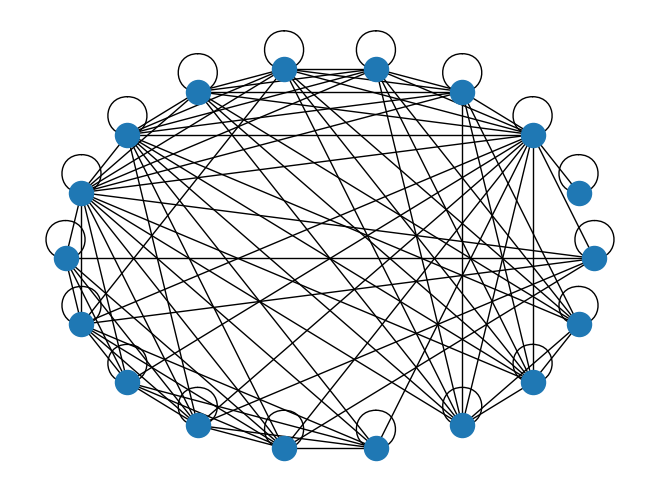

In [ ]:
# ### 7. Hasilkan grafik untuk dokumen untuk menerapkan algoritma PageRank


# menggambar grafik untuk melanjutkan algoritma textrank
# nx_graph adalah grafik yang dikembangkan menggunakan pustaka networkx
# setiap node mewakili sebuah kalimat
# tepi menyatakan bahwa mereka memiliki kesamaan kata
# bobot tepi adalah jumlah kata yang umum di kedua kalimat (node)
# nx.draw() digunakan untuk menggambar grafik yang dibuat


nx_graph = nx.from_scipy_sparse_array(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
# plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [ ]:
# ### 8. Mendapatkan peringkat setiap kalimat menggunakan pagerank

# ranks adalah kamus dengan key=node(kalimat) dan value=textrank (peringkat setiap kalimat)
ranks = nx.pagerank(nx_graph)

# melihat tipe data ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 640
0 0.04316592917450619
1 0.05001343805856971
2 0.04634898521701686
3 0.06466504860361885
4 0.07208045621078349
5 0.047154571081055835
6 0.041957187169389204
7 0.052219123700016856
8 0.06229534064546763
9 0.047123747793933704
10 0.061942433331954316
11 0.05583487449700418
12 0.06400187002858923
13 0.05763862576210972
14 0.04863795386517765
15 0.06822434700973648
16 0.07208045621078349
17 0.04461561164028649


In [ ]:
# ### 9. Menemukan kalimat penting dan membuat ringkasan

# metode enumerate: mengembalikan objek enumerate
# Penggunaan daftar Pemahaman
# O/p: larik_kalimat adalah urutan (urutan menurun nilai skor w.r.t.) larik peringkat 2-d[kalimat] dan kalimat
#Misalnya, jika ada dua kalimat: S1 (dengan skor S1 = s1) dan S2 dengan skor s2, dengan s2>s1
# maka larik_kalimat adalah [[s2, S2], [s1, S1]]
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

# sebagai kalimat_array dalam urutan nilai skor wrt menurun
# fmax adalah nilai skor terbesar (skor elemen pertama)
# fmin adalah nilai skor terkecil (skor elemen terakhir)
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

# print nilai terbesar dan terkecil dari skor kalimat
print(rank_max)
print(rank_min)

# Normalisasi skor
# agar keluar di range 0-1
# fmax menjadi 1
# fmin menjadi 0
# simpan nilai normalisasi dalam daftar temp_array
temp_array = []

# jika semua kalimat memiliki peringkat yang sama, berarti semuanya sama
# Mengambil kalimat apapun akan memberikan ringkasan, ucapkan kalimat pertama
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# Jika kalimat memiliki peringkat yang berbeda
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))


# Perhitungan ambang batas:
# Kami mengambil nilai rata-rata dari skor yang dinormalisasi
# kalimat apa pun dengan skor normalisasi 0,2 lebih dari nilai rata-rata dianggap
threshold = (sum(temp_array) / len(temp_array)) + 0.2


# Pisahkan kalimat yang memenuhi kriteria memiliki skor di atas ambang batas
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])


model = sentence_list

0.07208045621078349
0.041957187169389204
18


In [ ]:
# ### 10. Menulis ringkasan ke dalam file baru

# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)

# menyimpan data ke dalam file lain dengan nama sum.txt
f = open('sum.txt', 'a+')
#print(type(f))
f.write('-------------------\n')
f.write(summary)
f.write('\n')

f.close

for lines in sentence_list:
    print(lines)


Dengan pembelajaran di Kelas Cendekia, pengguna dapat merasakan proses pembelajaran 
yang berbeda dimana proses pembelajaran diharapkan dapat berjalan lebih efektif dan efisien. Dengan pembelajaran di Kelas Cendekia, pengguna dapat merasakan  proses pembelajaran yang 
berbeda dimana proses pembelajaran diharapkan dapat berjalan lebih efektif dan efisien. PENDAHULUAN  
 
Kelas Cendekia merupakan suatu konsep proses pembelajaran modern dimana 
pengguna dapat melakukan proses pembelajaran secara kolaboratif dimanapun dan kapanpun. com, 2idham@ ugm.ac.id   
 
 
Abstrak  
Kelas Cendekia merupakan suatu konsep proses pembelajaran modern dimana 
pengguna dapat melakukan proses pembelajaran secara kolaboratif dimanapun dan kapanpun. The recommendation system of collaborative filtering is the most 
appropriate system with the intellectual class. Kata kunci —sistem rekomendasi, kelas cendekia,  lingkungan  virtual  
 
 
Abstract  
 Intelligent  Clasroom s is a concept of modern learning process 